## <center>Digit Recognition using Convolutional Neural Network (CNN)</center>


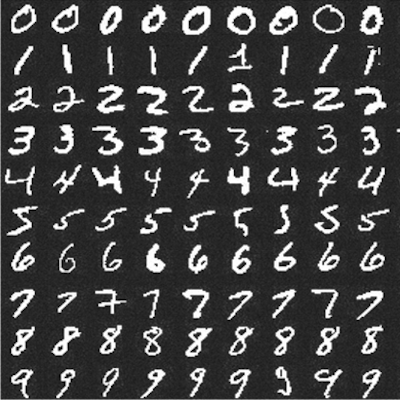

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np 
import pandas as pd 
import math
import datetime
import platform

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)

Python version: 3.10.11
Tensorflow version: 2.14.0


In [5]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [6]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Data Overview
<hr>

### Dimension of train and test data 


In [11]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [13]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [14]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

### Splitting data into training and validation dataset

We are dividing our dataset __(X)__ into two parts. 
<ol>
    <li> The <b>training dataset (80%)</b> is used to fit our models</li>
    <li>The <b>Validation dataset (20%)</b> is used to evaluate our models</li>
 </ol>

<code>train_test_split()</code> method returns us the training data, its labels and also the validation data and its labels. 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

###  Dimension of training and validation data


In [17]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


### Converting training, testing, and validation data into array

In [18]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

### Dimension of training, testing, and validation data after reshaping

In [19]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [20]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


## Explore the data 
    
Here is how each image in the dataset looks like. It is a <code>28x28</code> matrix of integers (from 0 to 255) and each integer represents a color of a pixel.

In [21]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


### Visualise how the digits were written 
This number matrix may be drawn as follows:

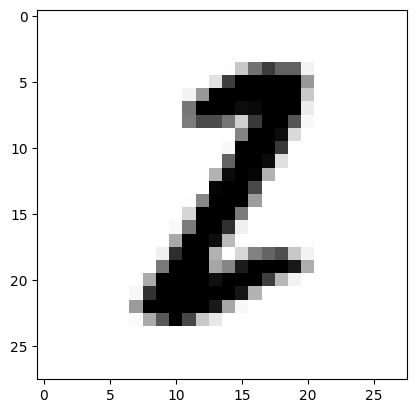

In [22]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

Our first record of training data represents 2.

Let's print some more training examples to get the feeling of how the digits were written.

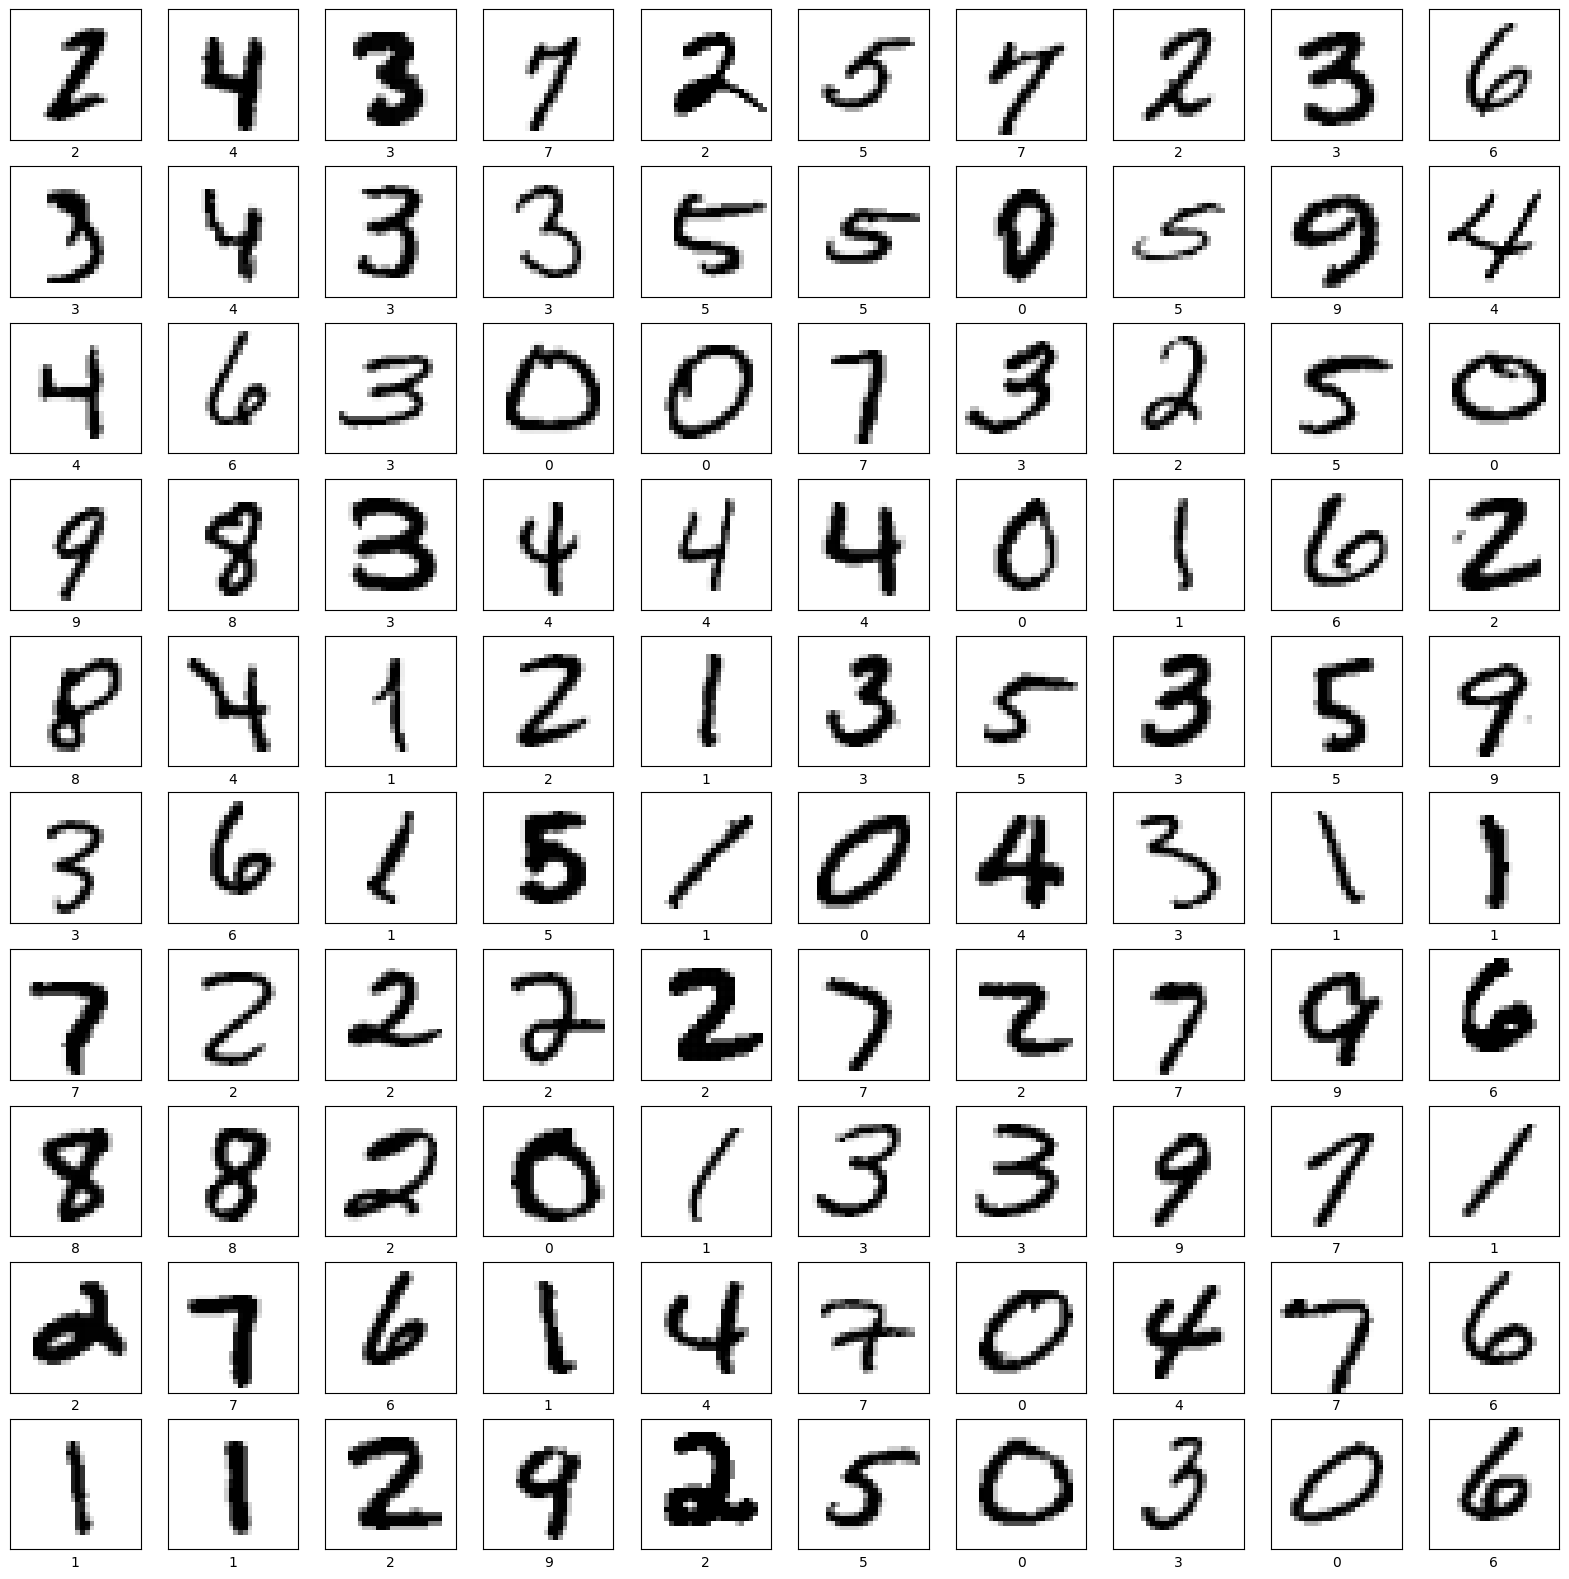

In [23]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

### Reshaping train, test, and validation data 
In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of (28, 28) which means that it is a 28x28 matrix of color values form 0 to 255. We need to reshape it to (28, 28, 1) shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [24]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [25]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


###  Normalize train, test, and validation data 


Here we're just trying to normalize from values range of [0...255] to [0...1].

In [26]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [27]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## Build the CNN model to Classify Handwritten Digits 
<hr>

A Convolutional Neural Network model generally consists of convolutional and pooling layers.

We are using Sequential Keras model which have two pairs of Convolution2D and MaxPooling2D layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use Flatten layer to convert multidimensional parameters to vector.

The last layer will be a Dense layer with 10 Softmax outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is 0, the 1-st output represents a probability that the input digit is 1 and so on...

In [28]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

### Summary of the training model 

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

### Compile the model using keras.optimizers.Adam 

In [31]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

### Train the model 

In [32]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 30s 25ms/step - loss: 0.2762 - accuracy: 0.9139 - val_loss: 0.0996 - val_accuracy: 0.9692
Epoch 2/10
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0856 - accuracy: 0.9732 - val_loss: 0.0741 - val_accuracy: 0.9780
Epoch 3/10
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0628 - accuracy: 0.9797 - val_loss: 0.0548 - val_accuracy: 0.9840
Epoch 4/10
1050/1050 [==============================] - 33s 32ms/step - loss: 0.0510 - accuracy: 0.9841 - val_loss: 0.0509 - val_accuracy: 0.9860
Epoch 5/10
1050/1050 [==============================] - 33s 31ms/step - loss: 0.0405 - accuracy: 0.9868 - val_loss: 0.0494 - val_accuracy: 0.9855
Epoch 6/10
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0352 - accuracy: 0.9882 - val_loss: 0.0472 - val_accuracy: 0.9871
Epoch 7/10
1050/1050 [==============================] - 27s 26ms/step - loss: 0.0313 - accuracy: 0.9892 - val_loss: 0.0500 -

## Model evaluation 
<hr>



### Loss plot curve for training and validation

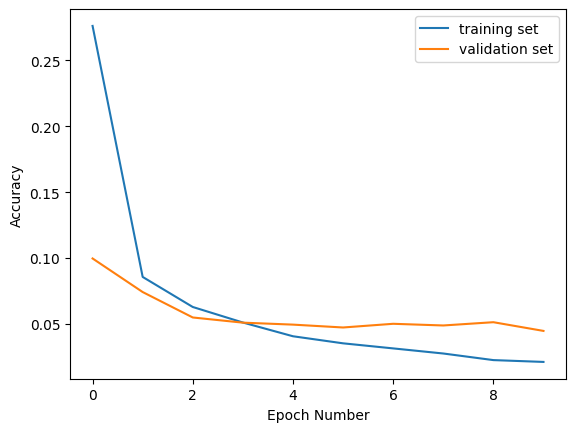

In [33]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

### Accuracy plot curve for training and validation

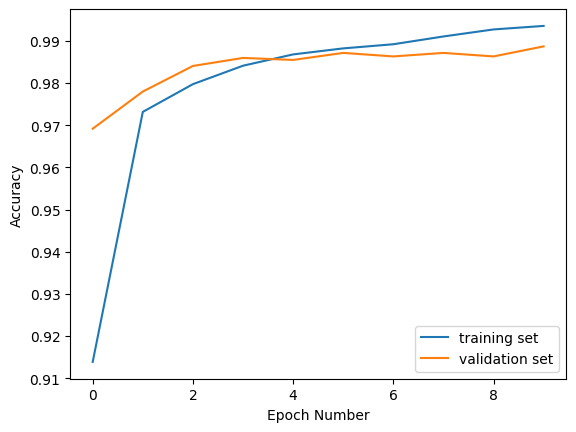

In [34]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

### Evaluation of the model accuracy



### Performance of training dataset 

In [35]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

In [36]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.00853637047111988
Train accuracy:  0.9974107146263123


### Performance of validation dataset 

In [52]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

In [54]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.04460187256336212
Validation accuracy:  0.9886904954910278


With a validation score of close to 99%, we proceed to use this model to predict for the test set.

### Save and load the model
We will save the entire model to a HDF5 file. The .h5 extension of the file indicates that the model should be saved in Keras format as HDF5 file. 

In [39]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

c:\Users\reach\anaconda3\envs\testenv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
loaded_model = tf.keras.models.load_model(model_name)

### Visualise validation predicted data on how the digits were written

To use the model that we've just trained for digits recognition we need to call predict() method.

In [41]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

263/263 [==============================] - 4s 12ms/step


In [42]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


Each prediction consists of 10 probabilities (one for each number from 0 to 9). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [43]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.207165e-11,9.999998e-01,1.196179e-07,3.558691e-13,2.472972e-10,6.094558e-14,6.232415e-10,3.462576e-09,1.385562e-07,2.679493e-12
1,1.108471e-14,4.814213e-11,6.623668e-11,9.999993e-01,2.103885e-14,7.715913e-07,2.933266e-14,1.611687e-10,1.440067e-09,3.285394e-08
2,1.095590e-13,2.257536e-12,3.194043e-08,1.519101e-06,1.091177e-13,6.012932e-09,3.891148e-11,9.049510e-13,9.999985e-01,9.621907e-11
3,2.885320e-12,9.999990e-01,7.385314e-08,1.832218e-11,2.790181e-08,2.740324e-12,3.255858e-10,6.668624e-07,8.593823e-08,8.888454e-10
4,1.207023e-15,1.854885e-12,8.983623e-10,2.165400e-06,9.311774e-06,1.446539e-11,3.334001e-18,6.830302e-06,1.170036e-05,9.999700e-01
...,...,...,...,...,...,...,...,...,...,...
8395,3.233271e-19,1.976925e-13,3.138090e-14,6.815623e-20,1.000000e+00,1.181026e-19,1.284362e-13,5.747779e-15,7.237094e-18,4.921126e-13
8396,7.259328e-17,4.380265e-20,2.243245e-20,8.310188e-13,8.385735e-18,1.000000e+00,1.563429e-09,4.682855e-21,1.134244e-08,1.292858e-15
8397,3.118867e-13,2.341051e-11,8.002897e-12,1.115955e-09,2.148965e-08,1.070736e-11,3.976746e-17,9.999948e-01,1.867906e-10,5.267931e-06
8398,3.974369e-08,6.969316e-12,6.217780e-10,4.483040e-09,4.944661e-09,3.203048e-06,9.999968e-01,6.958341e-13,1.809603e-08,1.187436e-09


In [44]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


So our model is predicting that the first example from the validation set is 1.

Let's print the first image from a validation set to see if model's prediction is correct.

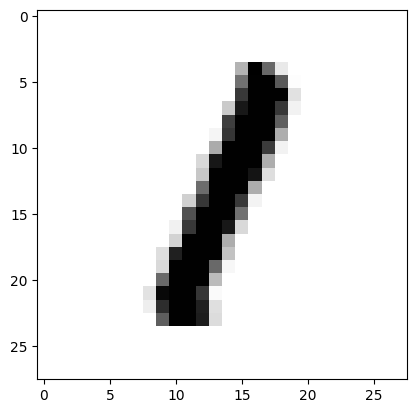

In [45]:
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit 1. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

C:\Users\reach\AppData\Local\Temp\ipykernel_23908\547587288.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


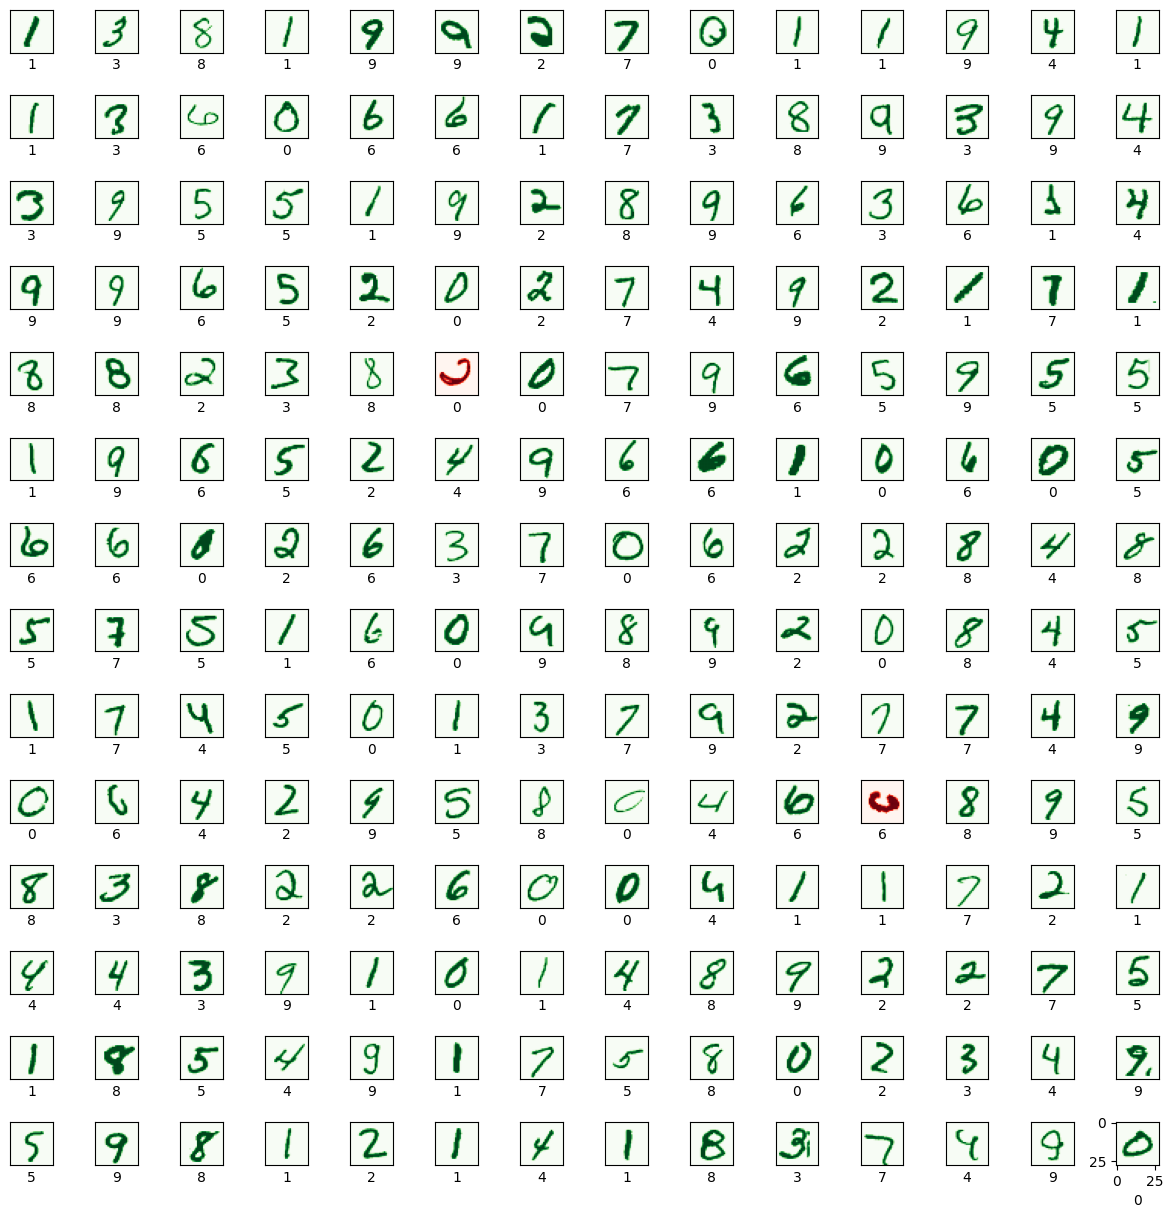

In [55]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

###  Confusion matrix of validation dataset 
Confusion matrix shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly.

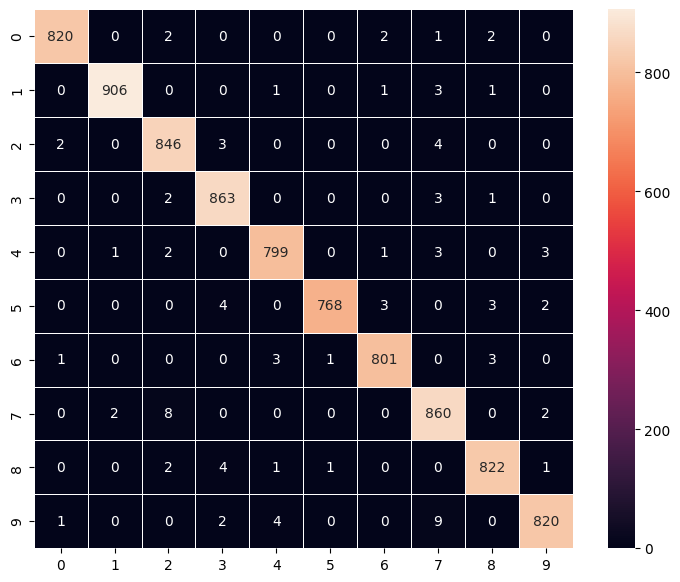

In [47]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Model prediction on unseen dataset (test data) 
<hr>


In [48]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 [==============================] - 8s 9ms/step
predictions_one_hot: (28000, 10)


Each prediction has ten probabilities (one for each number from 0 to 9). We need to choose the digit with the highest probability.

#### Predicted probabilities of all digits.

In [49]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,3.272376e-15,3.906794e-14,1.000000e+00,4.757070e-10,6.492377e-14,2.317558e-17,1.040549e-16,3.962088e-09,2.900882e-13,4.400187e-16
1,9.999743e-01,6.351516e-10,4.561993e-09,2.829962e-11,1.600379e-11,4.626903e-08,2.402916e-08,4.805321e-08,7.836044e-11,2.559425e-05
2,2.335952e-16,6.074610e-12,5.805999e-10,2.808531e-07,5.067948e-06,1.544151e-11,1.291108e-17,3.348779e-08,1.425338e-06,9.999932e-01
3,2.303443e-01,6.005023e-10,2.911743e-04,3.918036e-06,9.878885e-05,7.631829e-09,6.560043e-08,1.259732e-06,2.515138e-04,7.690089e-01
4,1.010079e-15,1.984531e-12,6.122607e-09,1.000000e+00,7.225705e-17,3.450392e-10,3.818332e-14,7.085375e-11,1.447929e-08,5.567333e-13
...,...,...,...,...,...,...,...,...,...,...
27995,6.773873e-17,8.017977e-18,2.376616e-13,2.491762e-08,1.178722e-07,1.735891e-12,1.190987e-21,2.080283e-07,3.087423e-10,9.999996e-01
27996,2.605963e-14,4.828765e-11,3.149400e-09,1.243333e-09,2.284438e-08,8.863476e-13,3.266697e-17,9.999999e-01,2.171823e-13,9.230602e-08
27997,1.808113e-25,4.025684e-18,7.305579e-18,1.000000e+00,4.445755e-25,1.534343e-12,1.075417e-21,1.005643e-14,1.308837e-13,2.170095e-18
27998,4.647945e-15,1.373795e-13,1.580244e-11,8.127543e-09,4.958841e-06,5.556159e-12,2.665159e-18,2.754609e-08,1.467225e-10,9.999950e-01


### Visualise test predicted data how the digits were written

Predicted digits with highest probabilites

#### Actual first digit from the test data

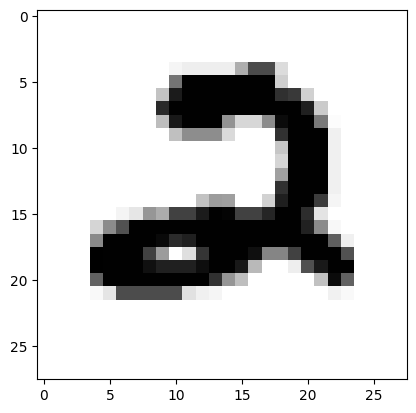

In [50]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

So our model is predicting that the first example from the test data is 2.